In [3]:
#Import all needed Packages

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

In [4]:
#Set path to .csv file original Data Frame iss IMDB_df
IMDB_df = pd.read_csv('IMDB_Horror_Movies.csv')
IMDB_df.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


In [5]:
#Clean .csv file
IMDB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3328 non-null   object 
 1   Genres             3327 non-null   object 
 2   Release Date       3328 non-null   object 
 3   Release Country    3328 non-null   object 
 4   Movie Rating       1451 non-null   object 
 5   Review Rating      3076 non-null   float64
 6   Movie Run Time     2784 non-null   object 
 7   Plot               3327 non-null   object 
 8   Cast               3314 non-null   object 
 9   Language           3257 non-null   object 
 10  Filming Locations  2096 non-null   object 
 11  Budget             1234 non-null   object 
dtypes: float64(1), object(11)
memory usage: 312.1+ KB


In [6]:
## .describe() to look at row counts
IMDB_df.describe()

,Review Rating
count,3076.000000
mean,5.077016
std,1.474272
min,1.000000
25%,4.000000
50%,5.000000
75%,6.100000
max,9.800000


In [7]:
# Dropped "Movie Rating", "Movie Run Time", "Plot", "Cast", "Language", and "Budget" columns to keep relevant data
#First iteration "Best used for x"
IMDB_Clean1_df = IMDB_df[["Title", "Genres", "Release Date","Release Country" ,"Review Rating", "Filming Locations"]]
IMDB_Clean1_df.head()

,Title,Genres,Release Date,Release Country,Review Rating,Filming Locations
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,3.9,"New York, USA"
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,"Sudbury, Ontario, Canada"
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,3.7,"Baltimore, Maryland, USA"
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,5.8,NaN


In [8]:
# .info to see non-Null Counts
IMDB_Clean1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3328 non-null   object 
 1   Genres             3327 non-null   object 
 2   Release Date       3328 non-null   object 
 3   Release Country    3328 non-null   object 
 4   Review Rating      3076 non-null   float64
 5   Filming Locations  2096 non-null   object 
dtypes: float64(1), object(5)
memory usage: 156.1+ KB


In [9]:
# Dropped nulls .info again to check row len
IMDB_Clean2_df = IMDB_Clean1_df.dropna()
IMDB_Clean2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 3327
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1960 non-null   object 
 1   Genres             1960 non-null   object 
 2   Release Date       1960 non-null   object 
 3   Release Country    1960 non-null   object 
 4   Review Rating      1960 non-null   float64
 5   Filming Locations  1960 non-null   object 
dtypes: float64(1), object(5)
memory usage: 107.2+ KB


In [10]:
# .value count for genre column 
IMDB_Clean2_df.Genres.value_counts()

 Horror                                                 482
 Horror| Thriller                                       304
 Comedy| Horror                                         143
 Horror| Mystery| Thriller                              131
 Drama| Horror| Thriller                                104
                                                       ... 
 Drama| Horror| Musical| Thriller                         1
 Action| Crime| Horror| Western                           1
 Action| Adult| Comedy| Horror| Sci-Fi| Western           1
 Comedy| Horror| Romance| Thriller                        1
 Comedy| Fantasy| Horror| Mystery| Romance| Thriller      1
Name: Genres, Length: 196, dtype: int64

In [11]:
# iterate through genre columns to count max number of total genres listed 
var = [len(x.split('|'))for x in IMDB_Clean2_df['Genres'].tolist()]
var.sort()
var[-10:]

[6, 6, 6, 6, 7, 7, 7, 7, 7, 8]

In [12]:
# View Release Date column for quick check of variations in data entry
IMDB_Clean2_df["Release Date"].head(25)

0     26-Oct-12
3     23-Apr-13
7     25-Apr-15
8     28-May-17
11     1-May-12
13         2013
14    21-Mar-17
15    13-Jan-17
16    23-Mar-15
17     8-Apr-16
19    16-Sep-14
20    18-Feb-12
21     8-Jun-13
22     5-May-15
24    25-May-16
25     1-Oct-12
26         2012
28    15-Aug-14
29         2013
30    19-Apr-13
31     2-Nov-16
36     9-Mar-17
38    21-Feb-14
39    27-Sep-14
40    31-Mar-14
Name: Release Date, dtype: object

In [13]:
### Create genre columns 1-8
for x in range(1,9):
    IMDB_Clean2_df[f'Genre_{x}'] = [np.nan for y in range(len(IMDB_Clean2_df))]
IMDB_Clean2_df.head()


C:\Users\12105\AppData\Local\Temp\ipykernel_23100\3497392165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IMDB_Clean2_df[f'Genre_{x}'] = [np.nan for y in range(len(IMDB_Clean2_df))]
C:\Users\12105\AppData\Local\Temp\ipykernel_23100\3497392165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IMDB_Clean2_df[f'Genre_{x}'] = [np.nan for y in range(len(IMDB_Clean2_df))]
C:\Users\12105\AppData\Local\Temp\ipykernel_23100\3497392165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Title,Genres,Release Date,Release Country,Review Rating,Filming Locations,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,3.9,"New York, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,3.7,"Baltimore, Maryland, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Parasyte: Part 2 (2015),Action| Drama| Horror| Sci-Fi,25-Apr-15,Japan,6.5,"Tokyo, Japan",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Stranger in the House (2015),Horror| Mystery| Thriller,28-May-17,Spain,4.6,"Warwick, New York, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Rise of the Animals (2011),Adventure| Comedy| Horror,1-May-12,USA,3.6,"Rochester, New York, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#
IMDB_Clean3_df = IMDB_Clean2_df.reset_index(drop=True)
IMDB_Clean3_df.head()

,Title,Genres,Release Date,Release Country,Review Rating,Filming Locations,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,3.9,"New York, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,3.7,"Baltimore, Maryland, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Parasyte: Part 2 (2015),Action| Drama| Horror| Sci-Fi,25-Apr-15,Japan,6.5,"Tokyo, Japan",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Stranger in the House (2015),Horror| Mystery| Thriller,28-May-17,Spain,4.6,"Warwick, New York, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rise of the Animals (2011),Adventure| Comedy| Horror,1-May-12,USA,3.6,"Rochester, New York, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#
for x,y in enumerate(IMDB_Clean3_df['Genres'].tolist()):
    try:
        temp_var = y.split('|')
        for i,j in enumerate(temp_var):

            IMDB_Clean3_df.at[x,f"Genre_{i+1}"]=j

    except:
        continue
IMDB_Clean3_df.head()

,Title,Genres,Release Date,Release Country,Review Rating,Filming Locations,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,3.9,"New York, USA",Drama,Horror,Thriller,NaN,NaN,NaN,NaN,NaN
1,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,3.7,"Baltimore, Maryland, USA",Comedy,Horror,Thriller,NaN,NaN,NaN,NaN,NaN
2,Parasyte: Part 2 (2015),Action| Drama| Horror| Sci-Fi,25-Apr-15,Japan,6.5,"Tokyo, Japan",Action,Drama,Horror,Sci-Fi,NaN,NaN,NaN,NaN
3,Stranger in the House (2015),Horror| Mystery| Thriller,28-May-17,Spain,4.6,"Warwick, New York, USA",Horror,Mystery,Thriller,NaN,NaN,NaN,NaN,NaN
4,Rise of the Animals (2011),Adventure| Comedy| Horror,1-May-12,USA,3.6,"Rochester, New York, USA",Adventure,Comedy,Horror,NaN,NaN,NaN,NaN,NaN


In [16]:
#
IMDB_Clean3_df.head()

,Title,Genres,Release Date,Release Country,Review Rating,Filming Locations,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,3.9,"New York, USA",Drama,Horror,Thriller,NaN,NaN,NaN,NaN,NaN
1,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,3.7,"Baltimore, Maryland, USA",Comedy,Horror,Thriller,NaN,NaN,NaN,NaN,NaN
2,Parasyte: Part 2 (2015),Action| Drama| Horror| Sci-Fi,25-Apr-15,Japan,6.5,"Tokyo, Japan",Action,Drama,Horror,Sci-Fi,NaN,NaN,NaN,NaN
3,Stranger in the House (2015),Horror| Mystery| Thriller,28-May-17,Spain,4.6,"Warwick, New York, USA",Horror,Mystery,Thriller,NaN,NaN,NaN,NaN,NaN
4,Rise of the Animals (2011),Adventure| Comedy| Horror,1-May-12,USA,3.6,"Rochester, New York, USA",Adventure,Comedy,Horror,NaN,NaN,NaN,NaN,NaN


In [27]:
#
IMDB_Clean3_df[['Day', 'Month', 'Year']] =  IMDB_Clean3_df['Release Date'].str.split("-", expand = True)
print(IMDB_Clean3_df.count())
IMDB_Clean3_df.head()

Title                1960
Genres               1960
Release Date         1960
Release Country      1960
Review Rating        1960
Filming Locations    1960
Genre_1              1960
Genre_2              1478
Genre_3               859
Genre_4               310
Genre_5                90
Genre_6                25
Genre_7                 6
Genre_8                 1
Day                  1960
Month                1865
Year                 1865
Release Year         1960
dtype: int64


,Title,Genres,Release Date,Release Country,Review Rating,Filming Locations,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Day,Month,Year,Release Year
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,3.9,"New York, USA",Drama,Horror,Thriller,NaN,NaN,NaN,NaN,NaN,26,Oct,12,2012
1,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,3.7,"Baltimore, Maryland, USA",Comedy,Horror,Thriller,NaN,NaN,NaN,NaN,NaN,23,Apr,13,2013
2,Parasyte: Part 2 (2015),Action| Drama| Horror| Sci-Fi,25-Apr-15,Japan,6.5,"Tokyo, Japan",Action,Drama,Horror,Sci-Fi,NaN,NaN,NaN,NaN,25,Apr,15,2015
3,Stranger in the House (2015),Horror| Mystery| Thriller,28-May-17,Spain,4.6,"Warwick, New York, USA",Horror,Mystery,Thriller,NaN,NaN,NaN,NaN,NaN,28,May,17,2017
4,Rise of the Animals (2011),Adventure| Comedy| Horror,1-May-12,USA,3.6,"Rochester, New York, USA",Adventure,Comedy,Horror,NaN,NaN,NaN,NaN,NaN,1,May,12,2012


In [28]:
#
IMDB_Clean3_df['Release Year'] = pd.DatetimeIndex(IMDB_Clean3_df['Release Date']).year
IMDB_Clean3_df.head()

,Title,Genres,Release Date,Release Country,Review Rating,Filming Locations,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Day,Month,Year,Release Year
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,3.9,"New York, USA",Drama,Horror,Thriller,NaN,NaN,NaN,NaN,NaN,26,Oct,12,2012
1,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,3.7,"Baltimore, Maryland, USA",Comedy,Horror,Thriller,NaN,NaN,NaN,NaN,NaN,23,Apr,13,2013
2,Parasyte: Part 2 (2015),Action| Drama| Horror| Sci-Fi,25-Apr-15,Japan,6.5,"Tokyo, Japan",Action,Drama,Horror,Sci-Fi,NaN,NaN,NaN,NaN,25,Apr,15,2015
3,Stranger in the House (2015),Horror| Mystery| Thriller,28-May-17,Spain,4.6,"Warwick, New York, USA",Horror,Mystery,Thriller,NaN,NaN,NaN,NaN,NaN,28,May,17,2017
4,Rise of the Animals (2011),Adventure| Comedy| Horror,1-May-12,USA,3.6,"Rochester, New York, USA",Adventure,Comedy,Horror,NaN,NaN,NaN,NaN,NaN,1,May,12,2012


In [29]:
#
IMDB_Clean3_df.count()

Title                1960
Genres               1960
Release Date         1960
Release Country      1960
Review Rating        1960
Filming Locations    1960
Genre_1              1960
Genre_2              1478
Genre_3               859
Genre_4               310
Genre_5                90
Genre_6                25
Genre_7                 6
Genre_8                 1
Day                  1960
Month                1865
Year                 1865
Release Year         1960
dtype: int64

In [30]:
#
IMDB_Clean4_df = IMDB_Clean3_df.drop(columns = ["Release Date","Day", "Year"])
IMDB_Clean4_df.head()

,Title,Genres,Release Country,Review Rating,Filming Locations,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Month,Release Year
0,Gut (2012),Drama| Horror| Thriller,USA,3.9,"New York, USA",Drama,Horror,Thriller,NaN,NaN,NaN,NaN,NaN,Oct,2012
1,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,USA,3.7,"Baltimore, Maryland, USA",Comedy,Horror,Thriller,NaN,NaN,NaN,NaN,NaN,Apr,2013
2,Parasyte: Part 2 (2015),Action| Drama| Horror| Sci-Fi,Japan,6.5,"Tokyo, Japan",Action,Drama,Horror,Sci-Fi,NaN,NaN,NaN,NaN,Apr,2015
3,Stranger in the House (2015),Horror| Mystery| Thriller,Spain,4.6,"Warwick, New York, USA",Horror,Mystery,Thriller,NaN,NaN,NaN,NaN,NaN,May,2017
4,Rise of the Animals (2011),Adventure| Comedy| Horror,USA,3.6,"Rochester, New York, USA",Adventure,Comedy,Horror,NaN,NaN,NaN,NaN,NaN,May,2012


In [77]:
# Define a custom sort order for the months
month_order = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Assuming 'month_column' is the column with months in your DataFrame
df_sorted = IMDB_Clean4_df.sort_values(by='Month', key=lambda x: x.map(month_order))
df_sorted


,Title,Genres,Release Country,Review Rating,Filming Locations,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Month,Release Year
995,May I Kill U? (2012),Comedy| Horror| Thriller,UK,5.6,"London, England, UK",Comedy,Horror,Thriller,NaN,NaN,NaN,NaN,NaN,Jan,2013
814,3 Bellezas (2014),Comedy| Horror| Thriller,Venezuela,6.6,"Caracas, Venezuela",Comedy,Horror,Thriller,NaN,NaN,NaN,NaN,NaN,Jan,2015
212,Darling (2015),Comedy| Horror,India,6.1,"Chennai, Tamil Nadu, India",Comedy,Horror,NaN,NaN,NaN,NaN,NaN,NaN,Jan,2015
1752,The Woman in Black 2: Angel of Death (2014),Drama| Horror| Thriller,USA,4.9,"Old Royal Naval College, Greenwich, London, En...",Drama,Horror,Thriller,NaN,NaN,NaN,NaN,NaN,Jan,2015
1181,Aaah! Zombies!! (2007),Comedy| Horror,Netherlands,5.7,"Los Angeles, California, USA",Comedy,Horror,NaN,NaN,NaN,NaN,NaN,NaN,Jan,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,The Jungle (2013),Horror| Thriller,Australia,4.0,Indonesia,Horror,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,None,2013
1694,Cold Skin (2017),Adventure| Horror| Sci-Fi| Thriller,USA,5.9,"Lanzarote, Canary Islands, Spain",Adventure,Horror,Sci-Fi,Thriller,NaN,NaN,NaN,NaN,None,2017
1761,Monster Family (2017),Animation| Comedy| Family| Horror,USA,5.2,"Hannover, Niederachsen, Germany",Animation,Comedy,Family,Horror,NaN,NaN,NaN,NaN,None,2017
1808,One of Us (2017),Drama| Horror| Mystery| Thriller,USA,4.3,"Idyllwild, California, USA",Drama,Horror,Mystery,Thriller,NaN,NaN,NaN,NaN,None,2017


In [79]:
# Generate a summary statistics table of every month
months = IMDB_Clean4_df.groupby(['Month'])

sum_mo = months['Month'].count()

# Assemble the resulting series into a single summary DataFrame in order from Jan-Dec
df_sorted = pd.DataFrame({"Total": sum_mo})
df_sorted = df_sorted.sort_values(by='Month', key=lambda x: x.map(month_order))
df_sorted

,Total
Month,
Jan,147
Feb,137
Mar,163
Apr,159
May,130
Jun,133
Jul,141
Aug,135
Sep,195


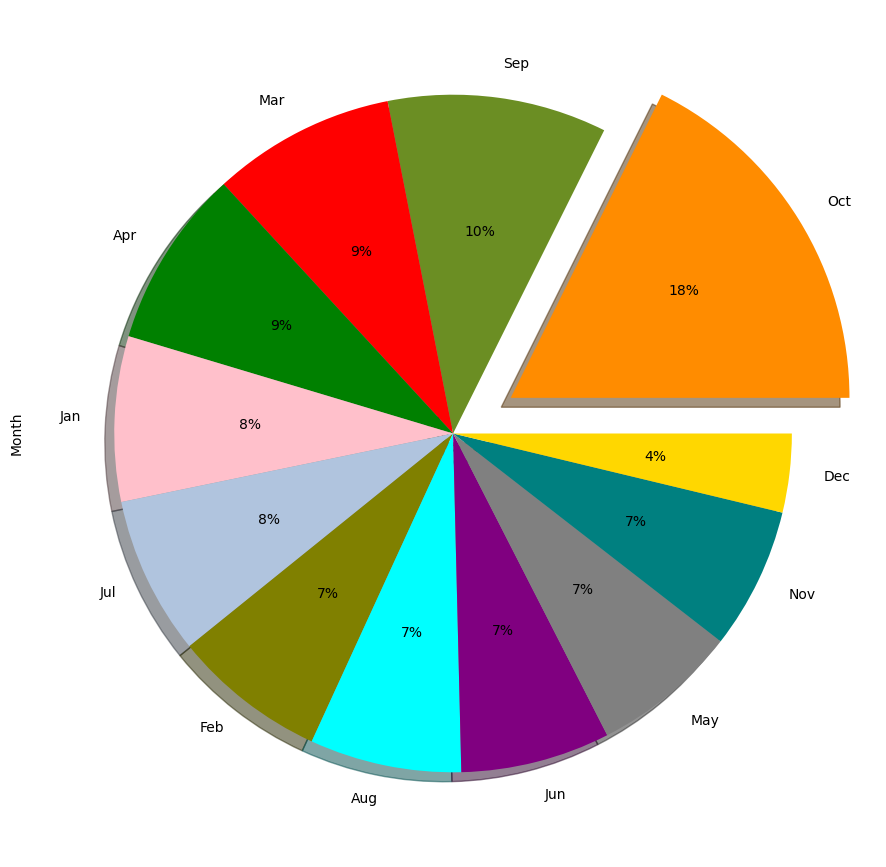

In [90]:
# Creating a pie chart to show which month releases most horror movies
total_mo = IMDB_Clean4_df['Month'].value_counts()

y = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
myexplode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
mycolors = ["darkorange", "olivedrab", "red", "green", "pink", "lightsteelblue","olive", "cyan",
            "purple", "gray", "teal", "gold"]

# to create the pie chart
total_mo.plot(kind = 'pie', y = y, figsize = (11,11), autopct='%1.0f%%', explode= myexplode,
              shadow = True, colors = mycolors)

plt.show()

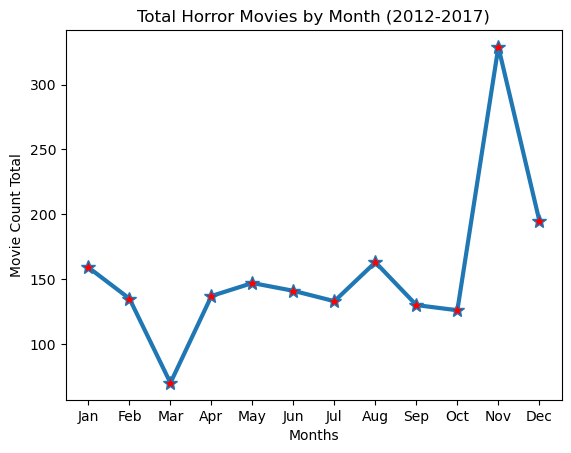

In [93]:
# Generate a line plot
mo = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
total_mo = months['Month'].value_counts()

plt.plot(mo, total_mo, marker = '*', ms = 10, mfc = 'r', linewidth = 3)
plt.title("Total Horror Movies by Month (2012-2017)")
plt.xlabel("Months")
plt.ylabel("Movie Count Total")

plt.show()

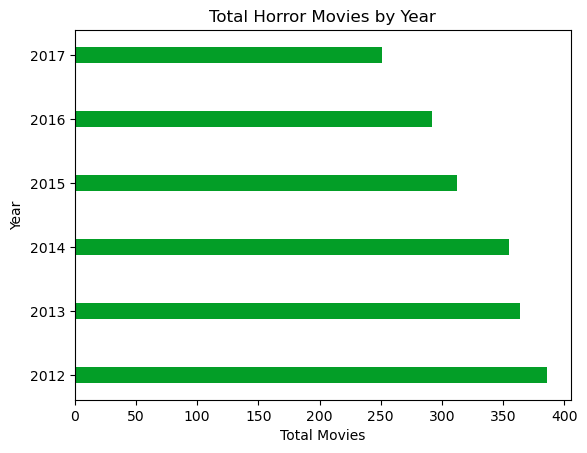

In [24]:
# setting up horizontal bar chart
yr = [2012,2013,2014,2015,2016,2017]
total_yr = IMDB_Clean4_df['Release Year'].value_counts()
width = 0.25
plt.barh(yr, total_yr, width, color = '#039E27')
# setting label of y-axis
plt.ylabel("Year")
# setting label of x-axis
plt.xlabel("Total Movies")
plt.title("Total Horror Movies by Year")
plt.show()

In [19]:
#
IMDB_df = IMDB_df.dropna()

IMDB_df.head(30)

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
11,Rise of the Animals (2011),Adventure| Comedy| Horror,1-May-12,USA,NOT RATED,3.6,70 min,"Directed by Chris Wojcik. With Greg Hoople, St...",Greg Hoople|Stephanie Motta|Adam Schonberg|Nik...,English,"Rochester, New York, USA","$7,000"
16,Zombie Resurrection (2014),Horror,23-Mar-15,UK,NOT RATED,2.7,86 min,"Directed by Jake Hawkins, Andy Phelps. With Er...",Eric Colvin|Jim Sweeney|Danny Brown|Simon Burb...,English,"Hampshire, England, UK","£100,000"
21,Before Dawn (2013),Horror,8-Jun-13,Japan,NOT RATED,4.7,82 min,"Directed by Dominic Brunt. With Dominic Brunt,...",Dominic Brunt|Joanne Mitchell|Eileen O'Brien|N...,English,"Yorkshire, England, UK","£25,000"
22,Apparition (2015),Fantasy| Horror| Thriller,5-May-15,USA,NOT RATED,4.0,100 min,"Directed by Quinn Saunders. With Katrina Law, ...",Katrina Law|Jody Quigley|Lili Bordán|Jarett Ar...,English,"Philadelphia, Pennsylvania, USA","$3,000,000"
30,Her Cry: La Llorona Investigation (2013),Horror,19-Apr-13,USA,NOT RATED,5.4,89 min,Directed by Damir Catic. With Nichole Ceballos...,Nichole Ceballos|James Ezrin|Ron Gelner|Everar...,English,"Houston, Texas, USA","$60,000"
38,Haunted House on Sorority Row (2014),Horror,21-Feb-14,USA,NOT RATED,5.6,81 min,"Directed by Henrique Couto. With Erin R. Ryan,...",Erin R. Ryan|Marylee Osborne|Iabou Windimere|J...,English,"Dayton, Ohio, USA","$65,000"
59,Legend Has It (2009),Horror,17-Sep-14,UK,NOT RATED,4.1,95 min,"Directed by Max Nikoff. With Todd Oeltze, Juli...",Todd Oeltze|Julia Fazakerly|Heath Finn|Amanda ...,English,"Pasadena, California, USA","$350,000"
70,Fetish Dolls Die Laughing (2012),Comedy| Fantasy| Horror,24-Apr-12,USA,NOT RATED,2.0,100 min,"Directed by David Silvio. With Laura Romeo, Mi...",Laura Romeo|Michael McGovern|Aaron Bernard|Ang...,English,"Pittsburgh, Pennsylvania, USA","$4,000"
71,Shame the Devil (2013),Crime| Horror| Thriller,9-Sep-14,USA,NOT RATED,3.5,94 min,"Directed by Paul Tanter. With Simon Phillips, ...",Simon Phillips|Juliette Bennett|Will de Meo|Br...,English,"London, England, UK","$3,000,000"
72,Holla II (2013),Comedy| Horror,19-Apr-13,USA,R,6.9,90 min,Directed by H.M. Coakley. With Vanessa Bell Ca...,Vanessa Bell Calloway|Kiely Williams|Greg Cipe...,English,"Ellenton, Florida, USA","$1,000,000"
